In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [3]:
df = pd.read_csv(r'C:\Users\A V NITHYA\Downloads\Keyword_data.csv')

# Creating copy of dataset for backup
df_copy = df.copy()

In [4]:
# Finding garbage rows
df[df.count(axis=1)<2].head()

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
0,Feb/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Apr/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Dropping garbage rows
df = df[df.count(axis=1)>2].reset_index(drop=True).drop('Title', axis = 1)
df.head(3)

,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
0,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
1,DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
2,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN


In [6]:
# Finding the total number of unique keywords
str(len(df.melt().value.unique()))+' Unique Keywords in total.'

'249 Unique Keywords in total.'

In [7]:
# Rearranging data to develop matrix
keywords1 = []
for l in [[[y,z] for y in x for z in x if z!=y] for x in df.stack().groupby(level=0).agg(list)]:
    for k in l:
        #print(k[0],'\n\n')
        keywords1 = keywords1 + k[:1]
keywords2 = []
for l in [[[y,z] for y in x for z in x if z!=y] for x in df.stack().groupby(level=0).agg(list)]:
    for k in l:
        #print(k[0],'\n\n')
        keywords2 = keywords2 + k[1:]

In [8]:
# Developing weighted matrix
adj_matrix = pd.crosstab(pd.DataFrame( keywords2, index = keywords1).reset_index()['index'], pd.DataFrame( keywords2, index = keywords1).reset_index()[0])
adj_matrix[:10]

,AGENCY theory,AGGRESSION (Psychology),AMBIVALENCE,ANGER in the workplace,BEHAVIORAL research,BOARDS of directors,BREAK-even analysis,BURNOUT (Psychology),BUSINESS communication,BUSINESS enterprises,...,VIOLENCE in the workplace,WAGE payment systems,WAGES,WOMEN -- Employment,WOMEN employees,WORK & family,WORK attitudes,WORK environment,WORK environment -- Psychological aspects,WORKFLOW
index,,,,,,,,,,,,,,,,,,,,,
AGENCY theory,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AGGRESSION (Psychology),0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,2,0,0
AMBIVALENCE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ANGER in the workplace,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
BEHAVIORAL research,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BOARDS of directors,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BREAK-even analysis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BURNOUT (Psychology),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BUSINESS communication,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


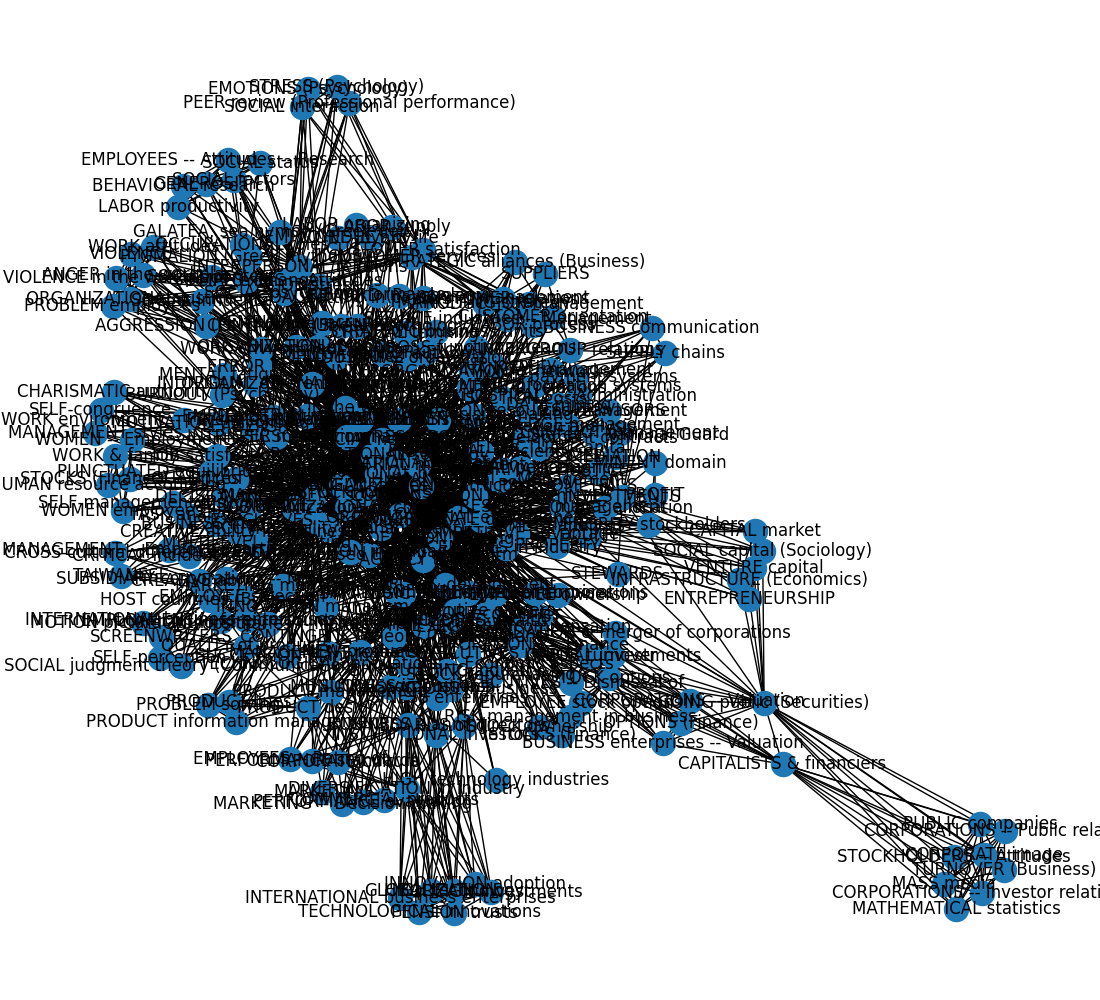

In [15]:
# Making the plot interactive
%matplotlib widget

# Converting the matrix into network
g = nx.MultiGraph(adj_matrix)

plt.figure(figsize=(11,10))

# Plotting the network
nx.draw(g, with_labels=True)
plt.show()

In [12]:
# Analyzing the network to find top 10 nodes by degree and top 10 nodes by strength
df_analysis = pd.merge(pd.DataFrame(g.degree(), columns=['Node','Degree']), 
                       pd.DataFrame(g.degree(weight='weight'), columns=['Node','Strength'])).set_index('Node')
print('Top 10 nodes by degree')
print(df_analysis.sort_values(by='Degree', ascending=False)[:10])
print('\n---------------------------------------------------\n\nTop 10 nodes by Strength')
print(df_analysis.sort_values(by='Strength', ascending=False)[:10])


Top 10 nodes by degree
                              Degree  Strength
Node                                          
ORGANIZATIONAL behavior          166       265
ORGANIZATIONAL effectiveness     104       144
MANAGEMENT science               102       136
PERSONNEL management              93       126
DECISION making                   90       112
ORGANIZATIONAL structure          74       107
ORGANIZATIONAL sociology          66        96
STRATEGIC planning                66        80
INDUSTRIAL management             64        84
CORPORATE governance              62        85

---------------------------------------------------

Top 10 nodes by Strength
                              Degree  Strength
Node                                          
ORGANIZATIONAL behavior          166       265
ORGANIZATIONAL effectiveness     104       144
MANAGEMENT science               102       136
PERSONNEL management              93       126
DECISION making                   90       112
ORGAN

It is observed that 'ORGANIZATIONAL behavior','ORGANIZATIONAL effectiveness',and 'MANAGEMENT science' are the top 3 keywords both by degree and strength. 

In [13]:
# Keyword co-occurrence analysis  
df_edges = pd.DataFrame(nx.get_edge_attributes(g, 'weight').keys(), columns = ['Node 1','Node 2','Weight'])
df_edges.Weight = nx.get_edge_attributes(g, 'weight').values()
print('Top 10 pairs of nodes by weight')
df_edges.sort_values(by = 'Weight', ascending = False)[:10]

Top 10 pairs of nodes by weight


,Node 1,Node 2,Weight
1796,ORGANIZATIONAL behavior,ORGANIZATIONAL effectiveness,11
1800,ORGANIZATIONAL behavior,ORGANIZATIONAL structure,9
1802,ORGANIZATIONAL behavior,PERSONNEL management,8
1648,MANAGEMENT science,ORGANIZATIONAL behavior,7
1881,ORGANIZATIONAL effectiveness,ORGANIZATIONAL structure,6
1799,ORGANIZATIONAL behavior,ORGANIZATIONAL sociology,6
704,DECISION making,ORGANIZATIONAL behavior,6
437,CORPORATE governance,ORGANIZATIONAL behavior,6
1945,ORGANIZATIONAL sociology,TEAMS in the workplace,5
1279,INDUSTRIAL management,ORGANIZATIONAL behavior,5


It is observed that ORGANIZATIONAL behavior and ORGANIZATIONAL effectiveness occur together most frequently in the articles. 

[]

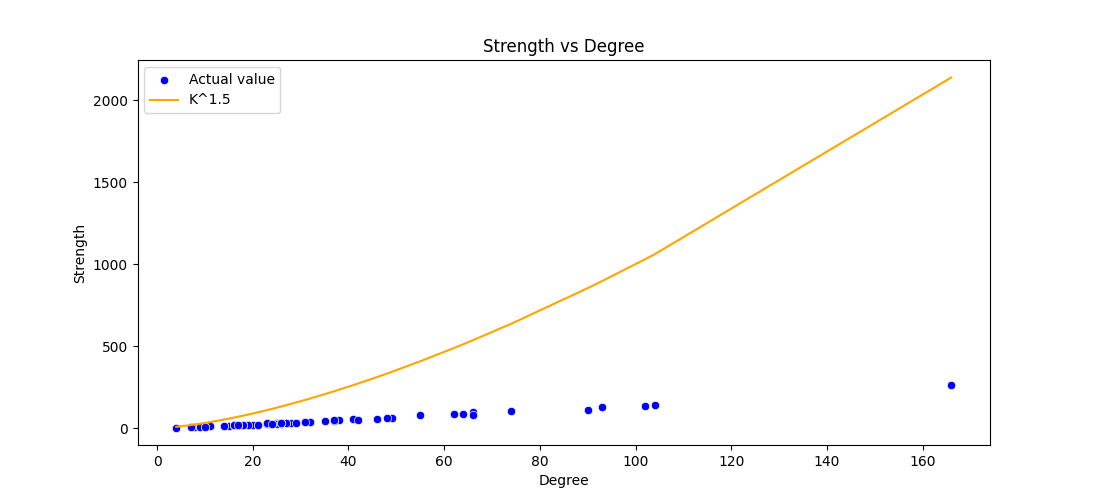

In [14]:
# Finding the relation between strength and degree of nodes
%matplotlib widget
plt.figure(figsize=(11,5))
sn.scatterplot(x = df_analysis.Degree, y = df_analysis.Strength, color = 'blue', label = 'Actual value')
sn.lineplot( x = df_analysis.Degree, y = df_analysis.Degree**1.5, color = 'orange', label='K^1.5').set(title='Strength vs Degree')
plt.plot()

It is observed that, higher the degree of a node, higher the strength i.e.,there are many keywords that are common across all the articles.  